<a href="https://colab.research.google.com/github/rch16/FYP/blob/master/MachineLearning/text_recognition_experimentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# imports
import csv, sys, os, h5py
import pandas as pd
import numpy as np

from sklearn import tree, metrics, svm
from skimage import io, filters, color, transform
from PIL import Image
from matplotlib import pyplot as plt
from scipy import ndimage as ndi
from scipy import io as sio

### Upload Recycling Labels Dataset
Each row in the csv file is a new image

In [0]:
path = "/content/label_dataset.csv"
path_l = "/content/label_dataset_l.csv"
N = 249

In [0]:
# load data
raw_data = open(path,'rt')
reader = csv.reader(raw_data,delimiter=',',quoting=csv.QUOTE_NONE)
x = list(reader)
data = np.array(x)

In [0]:
# load labels
raw_labels = open(path_l,'rt')
reader_l = csv.reader(raw_labels,delimiter=',',quoting=csv.QUOTE_NONE)
l = list(reader_l)
labels_array = np.array(l).astype('uint8')

labels = []
for i in range(N):
  labels.append(labels_array[i][0])
labels = np.array(labels)

In [0]:
print(data.shape)
print(labels.shape)

(249,)
(249,)


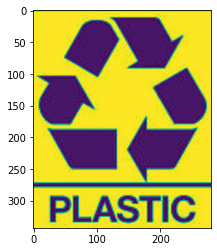

Number of Dimensions:  2


In [0]:
# view test image (recycling)
img = np.array(data[0]).astype(int)
w = 280
h = int(len(img)/280)

img = np.reshape(img,(h,w))
plt.imshow(img)
plt.show()
print("Number of Dimensions: ", img.ndim)

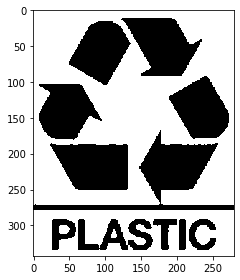

Number of Dimension 2


In [0]:
gray_image = color.rgb2gray(img)
thresh = filters.threshold_mean(gray_image)
binary_image = gray_image > thresh

io.imshow(binary_image)
io.show()

print("Number of Dimensions: ", binary_image.ndim)

Number of Objects:  12


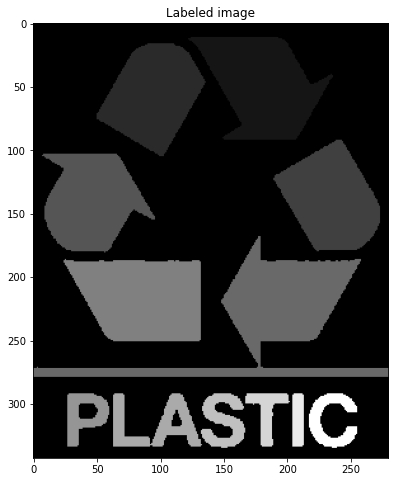

In [0]:
label_objects, nb_labels = ndi.label(np.invert(binary_image))
print("Number of Objects: ", nb_labels)

plt.subplots(ncols=1, nrows=1, figsize=(8, 8))
plt.imshow(label_objects, cmap=plt.cm.gray)
plt.title("Labeled image")
plt.show()

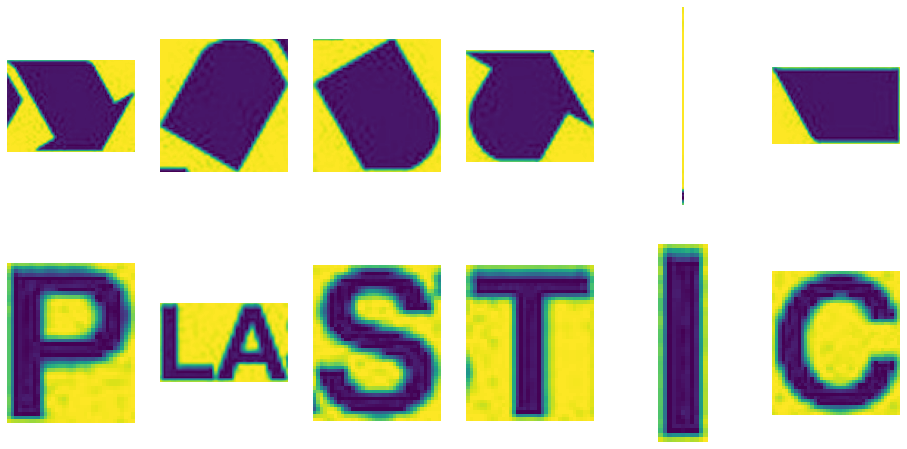

In [0]:
# show cropped image
rows = 2
cols = 6
count = 1
fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(16,8))

for i in(range(0, rows)):
    for j in(range(0, cols)):
        tmp = label_objects == count            
        r, = np.where(tmp.sum(axis=1) > 1)
        c, = np.where(tmp.sum(axis=0) > 1)

        # crop with border
        tmp_img = gray_image[(r.min()-1):(r.max()+2), (c.min()-1):(c.max()+2)]
        digit_x = transform.resize(tmp_img, (h,w), mode='reflect')

        axes[i,j].imshow(tmp_img) 
        axes[i,j].set_axis_off()
                        
        count = count+1       
        
plt.show()

### Upload Characters Dataset

Source: http://www.ee.surrey.ac.uk/CVSSP/demos/chars74k/

In [0]:
path_letters = "/content/letter_dataset.csv"
path_letters_l = "/content/letter_dataset_l.csv"
N = 7112

In [4]:
# load data
raw_data = open(path_letters,'rt')
reader = csv.reader(raw_data,delimiter=',',quoting=csv.QUOTE_NONE)
x = list(reader)
letter_array = np.array(x)

print(letter_array[7111])

letter_data = []
for i in range(N):
  letter_data.append(np.array(letter_array[i]).astype('uint8'))
letter_data = np.array(letter_data)


['156', '160', '158', '155', '157', '157', '153', '157', '158', '158', '156', '151', '154', '156', '162', '158', '152', '155', '160', '154', '156', '160', '155', '154', '159', '150', '156', '165', '155', '152', '157', '164', '155', '154', '156', '155', '152', '157', '157', '150', '151', '153', '156', '156', '158', '153', '153', '160', '154', '158', '156', '155', '150', '156', '154', '153', '157', '160', '159', '154', '161', '158', '156', '155', '150', '153', '158', '155', '153', '153', '146', '155', '161', '153', '152', '155', '149', '156', '159', '152', '151', '159', '156', '151', '153', '152', '158', '159', '155', '157', '150', '151', '152', '156', '161', '159', '159', '165', '161', '149', '150', '152', '146', '154', '161', '149', '148', '153', '150', '151', '152', '152', '154', '162', '152', '154', '155', '149', '146', '148', '154', '158', '160', '155', '152', '145', '153', '163', '156', '151', '161', '153', '150', '153', '159', '168', '165', '153', '156', '154', '150', '156', '162'

In [0]:
# load labels
raw_labels = open(path_letters_l,'rt')
reader_l = csv.reader(raw_labels,delimiter=',',quoting=csv.QUOTE_NONE)
l = list(reader_l)
labels_array = np.array(l).astype('uint8')

letter_labels = []
for i in range(N):
  letter_labels.append(labels_array[i][0])
letter_labels = np.array(letter_labels)

In [6]:
print(letter_data.shape)
print(letter_labels.shape)
print(len(letter_data[0]))

(7112,)
(7112,)
432


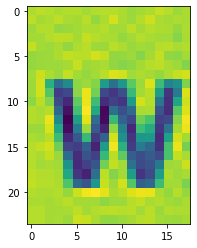

Number of Dimensions:  2
Class:  22


In [7]:
# view test image (recycling)
x = 0
img = np.array(letter_data[x]).astype(int)
l = letter_labels[x]
w = 24
h = 18

img = np.reshape(img,(w,h))
plt.imshow(img)
plt.show()

print("Number of Dimensions: ", img.ndim)
print("Class: ", l)

### Crop Digits

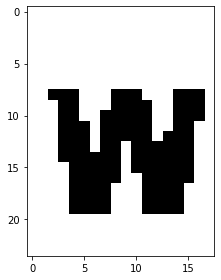

Number of Dimensions:  2


In [8]:
gray_image = color.rgb2gray(img)
thresh = filters.threshold_mean(gray_image)
binary_image = gray_image > thresh

io.imshow(binary_image)
io.show()

print("Number of Dimensions: ", binary_image.ndim)

Number of Objects:  1


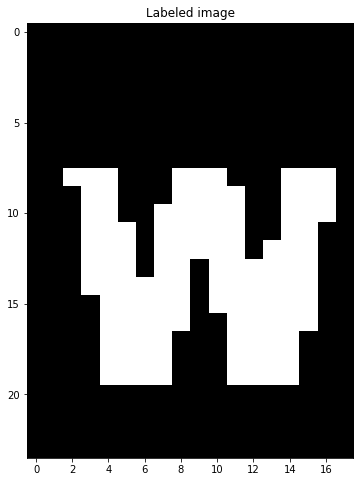

In [9]:
label_objects, nb_labels = ndi.label(np.invert(binary_image))
print("Number of Objects: ", nb_labels)

plt.subplots(ncols=1, nrows=1, figsize=(8, 8))
plt.imshow(label_objects, cmap=plt.cm.gray)
plt.title("Labeled image")
plt.show()

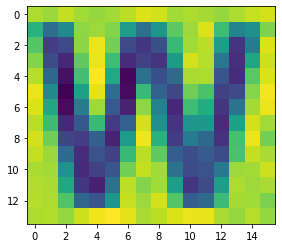

In [0]:
# show cropped image
tmp_img = gray_image[(r.min()-1):(r.max()+2), (c.min()-1):(c.max()+2)]
digit_x = transform.resize(tmp_img, (w,h), mode='reflect')

plt.imshow(tmp_img)      
        
plt.show()

### Support Vector Machines

Source: https://github.com/mrolarik/basic-character-recognition-tutorial/blob/master/006-support-vector-machine.ipynb

In [13]:
from collections import Counter
occurrences = Counter(letter_labels)
print(occurrences)

Counter({0: 558, 4: 446, 17: 389, 14: 382, 13: 363, 18: 342, 19: 312, 8: 302, 30: 227, 2: 215, 11: 215, 7: 193, 3: 191, 15: 159, 26: 158, 12: 149, 40: 148, 6: 143, 39: 135, 34: 127, 43: 126, 44: 124, 1: 115, 45: 111, 10: 92, 20: 92, 21: 84, 23: 80, 5: 79, 9: 77, 22: 67, 24: 67, 28: 63, 37: 58, 25: 55, 42: 54, 33: 52, 29: 46, 38: 43, 50: 43, 46: 41, 27: 38, 31: 37, 41: 37, 32: 36, 48: 36, 16: 35, 49: 35, 51: 35, 36: 34, 35: 33, 47: 33})


In [14]:
occ = []
for i in range(0,52):
  occ.append(occurrences[i])
print(occ)

[558, 115, 215, 191, 446, 79, 143, 193, 302, 77, 92, 215, 149, 363, 382, 159, 35, 389, 342, 312, 92, 84, 67, 80, 67, 55, 158, 38, 63, 46, 227, 37, 36, 52, 127, 33, 34, 58, 43, 135, 148, 37, 54, 126, 124, 111, 41, 33, 36, 35, 43, 35]


In [17]:
mean_occurrences = np.array(occ).mean()
print(mean_occurrences)

136.76923076923077


In [21]:
X = letter_data
y = letter_labels

clf_svm = svm.SVC()
clf_svm.fit(X,y)

ValueError: ignored